In [0]:
import h5py
import numpy as np

#Abrir datos
h5f = h5py.File('datos.h5', 'r')

#Cargamos los datos de entrenamiento 
x_train = h5f['x_train'][:]
y_train = h5f['y_train'][:]

#Cargamos los datos de test
x_test = h5f['x_test'][:]
y_test = h5f['y_test'][:]

y_extra = h5f['y_extra'][:]
h5f.close()

In [0]:
#Cargar variables independientes extras
h5f = h5py.File('extra', 'r') 
x_extra = h5f['x_extra'][:]
h5f.close()

In [0]:
print(x_train.shape)
print(y_test.shape)
x_train = np.concatenate((x_train,x_extra), axis=0)
x_train.shape

In [0]:
y_train = np.concatenate((y_train,y_extra), axis=0)
y_train.shape

In [0]:
#Agregar dimension de canal
x_train=np.expand_dims(x_train, axis=3).astype('float32')
x_test=np.expand_dims(x_test, axis=3).astype('float32')

In [6]:
from keras import models
from keras import layers
network = models.Sequential()

network.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(32,32,1)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(20, (5, 5), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

# Clasificador
network.add(layers.Flatten())
network.add(layers.Dense(100, activation='relu'))

# Neurona de salida
network.add(layers.Dense(10, activation='softmax'))

#Definimor el optmizador,la metricas para test/train y la funcion de perdida
network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

history = network.fit(x_train, y_train, epochs=1, batch_size=128, validation_data=(x_test, y_test))

Using TensorFlow backend.


Train on 273257 samples, validate on 26032 samples
Epoch 1/1
273257/273257 [==============================] - 271s 991us/step - loss: 0.4201 - categorical_accuracy: 0.8814 - val_loss: 0.4467 - val_categorical_accuracy: 0.8765


In [7]:
# Comprobacacion de error
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test_acc:', test_acc)


26032/26032 [==============================] - 14s 539us/step
test_acc: 0.876459741856177


In [0]:
#Error mostrando datos
#Visualizacion de datos
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.ylabel('Precision')
plt.xlabel('Numero de epoch')
plt.legend(['Train', 'Test'], loc= 0)

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Pérdida')
plt.xlabel('Numero de epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper right')

plt.tight_layout()

plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
Y_prediction = network.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

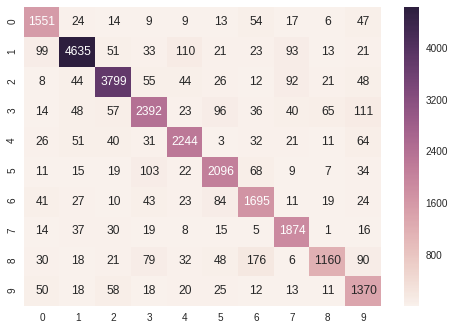

In [12]:
import seaborn as sns
plt.figure()
sns.heatmap(confusion_mtx, annot=True, fmt="d");